In [1]:
# ---------------- #
# Common Libraries #
# ---------------- #
      
# Standard Imports
import os
import re
import nltk
import requests
import unicodedata
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## setting basic style parameters for matplotlib
plt.rc('figure', figsize=(20, 10))
plt.style.use('seaborn-darkgrid')

# ------------- #
# LOCAL IMPORTS #
# ------------- #

# importing sys
import sys
# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')
# env containing sensitive access credentials
import env
from env import user, password, host
from env import get_db_url

# Import Local Helper Modules
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acq
import QMCBT_02_prepare as prep
import QMCBT_03_explore as exp
import QMCBT_04_visualize as viz
import QMCBT_05_model as mod
import QMCBT_wrangle as w

# Import py modules
import prepare as p

In [2]:
# Read-in data from compressed file
df = pd.read_pickle('michelin_df.pickle')

In [3]:
# Display DataFrame
df.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779
name,King's Joy,Xin Rong Ji (Xinyuan South Road),Taian Table,Ultraviolet by Paul Pairet,Quince,Atelier Crenn,Addison,Manresa,Benu,SingleThread,...,Mimo,A Casa do Porco,Più Iguatemi,Bistrot de Paris,AE! Cozinha,Szóstka,Fiorentina,Zazie,Butchery & Wine,alewino
address,"2 Wudaoying Hutong, Beijing, China Mainland","1F, East Tower, Genesis Beijing, 8 Xinyuan Sou...","101-102, Building No. 1, Garden Office, No.161...",'somewhere in Shanghai' - meet at Mr & Mrs Bun...,"470 Pacific Ave., San Francisco, 94133, USA","3127 Fillmore St., San Francisco, 94123, USA","5200 Grand Del Mar Way, San Diego, 92130, USA","320 Village Ln., Los Gatos, 95030, USA","22 Hawthorne St., San Francisco, 94105, USA","131 North St., Healdsburg, 95448, USA",...,"Rua Caconde 118, São Paulo, 01425-010, Brazil","Rua Araujo 124, São Paulo, 01220-020, Brazil","Avenida Brigadeiro Faria Lima 2232, São Paulo,...","Rua Augusta 2542, São Paulo, 01412-100, Brazil","Rua Áurea 285, São Paulo, 04015-070, Brazil","Plac Powstańców Warszawy 9, Warsaw, 00 039, Po...","ul. Grodzka 63, Cracow, 31 044, Poland","ul. Józefa 34, Cracow, 32 056, Poland","ul. Żurawia 22, Warsaw, 00 515, Poland","ul. Mokotowska 48, Warsaw, 00 543, Poland"
location,"Beijing, China Mainland","Beijing, China Mainland","Shanghai, China Mainland","Shanghai, China Mainland","San Francisco, USA","San Francisco, USA","San Diego, USA","Los Gatos, USA","San Francisco, USA","Healdsburg, USA",...,"São Paulo, Brazil","São Paulo, Brazil","São Paulo, Brazil","São Paulo, Brazil","São Paulo, Brazil","Warsaw, Poland","Cracow, Poland","Cracow, Poland","Warsaw, Poland","Warsaw, Poland"
price,¥¥¥,¥¥¥¥,¥¥¥¥,¥¥¥¥,$$$$,$$$$,$$$$,$$$$,$$$$,$$$$,...,NaN,NaN,NaN,NaN,NaN,€€,€€,€,€€,€€
cuisine,Vegetarian,Taizhou,Innovative,Innovative,"Contemporary, Californian","Contemporary, French","Contemporary, Californian","Contemporary, Californian","Asian, Contemporary","Contemporary, Californian",...,Modern Cuisine,Brazilian,"Italian, Creative",French,"Creative, Market Cuisine","Polish, Modern Cuisine","Creative, Polish",French,"Meats and Grills, Traditional Cuisine","Polish, Traditional Cuisine"
longitude,116.410004,116.450148,121.474049,121.48509,-122.403261,-122.43586,-117.198891,-121.98071,-122.39906,-122.869723,...,-46.658201,-46.644742,-46.688315,-46.665519,-46.645587,21.012698,19.938179,19.946949,21.015495,21.022057
latitude,39.946681,39.94638,31.221807,31.240358,37.797505,37.79835,32.941297,37.22761,37.785376,38.61226,...,-23.574572,-23.544867,-23.577106,-23.563072,-23.586913,52.235803,50.055898,50.05124,52.228581,52.225201
phone_number,861084049191.0,861065015501.0,8617301605350.0,NaN,14157758500.0,14154400460.0,18583141900.0,14083544330.0,14156854860.0,17077234646.0,...,551130522517.0,551132582578.0,551131987649.0,551130631675.0,551134768521.0,48224700342.0,48124264608.0,48500410829.0,48225023118.0,48226283830.0
url,https://guide.michelin.com/en/beijing-municipa...,https://guide.michelin.com/en/beijing-municipa...,https://guide.michelin.com/en/shanghai-municip...,https://guide.michelin.com/en/shanghai-municip...,https://guide.michelin.com/en/california/san-f...,https://guide.michelin.com/en/california/san-f...,https://guide.michelin.com/en/california/us-sa...,https://guide.michelin.com/en/california/los-g...,https://guide.michelin.com/en/california/san-f...,https://guide.michelin.com/en/california/heald...,...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/sao-paulo-region...,https://guide.michelin.com/en/masovia/warsaw/r...,https://guide.michelin.com/en/lesser-poland/cr...,https://guide.michelin.com/en/lesser-poland/cr...,https://guide.michelin.com/en/masovia/warsaw/r...,https://guide.michelin.com/en/masovia/warsaw/r...
website_url,NaN,NaN,https://taian-table.cn/,https://uvby

In [4]:
train, validate, test = p.prepare_michelin(df)

In [5]:
train.T.head(20)

,6345,6427,5217,3858,124,1527,4332,5796,5205,4453,...,2959,5577,6063,5925,1760,4492,2145,913,4738,4981
name,gasthaus ödenturm,weinhaus anker,yang bao bao (nanzih),le bistrot gastronómico,fat duck,song yun ze,dalie e fagioli,birrieria zaragoza,no name lamb soup,al bersagliere,...,hannappel,royal h.-bonhomme,le saint joseph,le clos monteils,oryori mashita,trattoria cibrèo-cibreino,the white room by jacob jan boerma,coto de quevedo,kyoyang siksa,bistro des chenapans
address,"am ödenturm 11, cham, 93413, germany","obertorstraße 13, marktheidenfeld, 97828, germany","106 chaoming road, nanzih district, kaohsiung,...","temprado 12, castelló de la plana, 12002, spain","high street, bray, sl6 2aq, united kingdom","no. 8, block 2, jade lane, crland plaza, 8 liu...","via campagnola 45, manerba del garda, 25080, i...","4852 s. pulaski rd., chicago, 60632, usa","144, section 2, fucian road, west central dist...","via dietro pallone 1, verona, 37121, italy",...,"dahlhauser straße 173, essen, 45279, germany","rue de la reffe 26, remouchamps, 4920, belgium","100 boulevard de la république, la garenne-col...","7 chemin du moulin, monteils, 82300, france","246 giommachi kitagawa, higashiyama-ku, kyoto,...","via dei macci 122 r, florence, 50122, italy","dam 9, amsterdam, 1012 js, netherlands","paraje tejeras viejas, torre de juan abad, 133...","238 itaewon-ro, yongsan-gu, seoul, south korea","2-14-1 kyomachibori, nishi-ku, osaka, 550-0003..."
location,"cham, germany","marktheidenfeld, germany","kaohsiung, taipei & taichung","castelló de la plana, spain","bray, united kingdom","chengdu, china mainland","manerba del garda, italy","chicago, usa","tainan, taipei & taichung","verona, italy",...,"essen, germany","remouchamps, belgium","la garenne-colombes, france","monteils, france","kyoto, japan","florence, italy","amsterdam, netherlands","torre de juan abad, spain","seoul, south korea","osaka, japan"
price,€,€,$,€€,££££,¥¥¥¥,€€,$,$,€,...,€€€,€€,€€,€€,¥¥¥,€,€€€€,€€€,₩₩,¥¥
cuisine,"country cooking, mediterranean cuisine","french, country cooking",dumplings,fusion,creative,sichuan,"modern cuisine, regional cuisine","mexican, regional cuisine",small eats,"regional cuisine, traditional cuisine",...,"modern cuisine, classic cuisine",traditional cuisine,modern cuisine,traditional cuisine,japanese,"country cooking, traditional cuisine",modern cuisine,traditional cuisine,barbecue,french
longitude,12.703851,9.600301,120.32805,-0.037028,-0.701753,104.089499,10.53301,-87.723342,120.21061,10.998027,...,7.105052,5.71121,2.240886,1.565979,135.773737,11.266419,4.894229,-3.049166,126.99994,135.490585
latitude,49.210919,49.845621,22.72416,39.983588,51.507858,30.622636,45.55678,41.805036,22.98633,45.436325,...,51.437062,50.479846,48.907332,44.173716,35.003944,43.771244,52.372726,38.579954,37.53592,34.684888
url,https://guide.michelin.com/en/bayern/cham/rest...,https://guide.michelin.com/en/bayern/marktheid...,https://guide.michelin.com/en/kaohsiung-region...,https://guide.michelin.com/en/comunidad-valenc...,https://guide.michelin.com/en/windsor-and-maid...,https://guide.michelin.com/en/chengdu-municipa...,https://guide.michelin.com/en/lombardia/manerb...,https://guide.michelin.com/en/illinois/chicago...,https://guide.michelin.com/en/tainan-region/ta...,https://guide.michelin.com/en/veneto/verona/re...,...,https://guide.michelin.com/en/nordrhein-westfa...,https://guide.michelin.com/en/liege/remouchamp...,https://guide.michelin.com/en/ile-de-france/la...,https://guide.michelin.com/en/occitanie/montei...,https://guide.michelin.com/en/kyoto-region/kyo...,https://guide.michelin.com/en/toscana/firenze/...,https://guide.michelin.com/en/noord-holland/am...,https://guide.michelin.com/en/castilla-la-manc...,https://guide.michelin.com/en/seoul-capital-ar...,https://guide.michelin.com/en/osaka-region/osa...
award,bib gourmand,bib gourmand,bib gourmand,bib gourmand,3 michelin stars,1 michelin star,bib gourmand,bib gourmand,bib gourmand,bib gourmand,...,1 michelin star,bib gourmand

In [6]:
# Display DataFrame information
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793 entries, 6345 to 4981
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     3793 non-null   string 
 1   address                  3793 non-null   string 
 2   location                 3793 non-null   string 
 3   price                    3793 non-null   object 
 4   cuisine                  3793 non-null   string 
 5   longitude                3793 non-null   float64
 6   latitude                 3793 non-null   float64
 7   url                      3793 non-null   object 
 8   award                    3793 non-null   string 
 9   facilities_and_services  3793 non-null   string 
 10  data                     3793 non-null   string 
 11  price_level              3793 non-null   int64  
 12  city                     3793 non-null   object 
 13  country                  3793 non-null   object 
 14  clean                

<div class="alert alert-info">

# Observations
* Dropping all nulls would remove 1336 documents (~135 documents have >1 Null)  

                          price:   54 Nulls
                   phone_number:  131 Nulls
                    website_url: 1238 Nulls
        facilities_and_services:   48 Nulls

* facilities_and_services nunique is 1571 

        * there are only 120 documents that share values with 10 or more other documents
        * there are 540 documents that share values with 2-9 other documents
        * there are 910 documents that are entirely unique

* There are only 16 locations that have more than 50 documents (awardees) and only half of those contain more than 100 documents  

        * Tokyo, Japan                    422
        * Kyoto, Japan                    196
        * Osaka, Japan                    193
        * New York, USA                   177
        * Paris, France                   164
        * Hong Kong                       135
        * Singapore                       119
        * London, United Kingdom          104
        * Bangkok, Thailand               103

* There are 863 unique cuisine values; 26 cuisine types that have more than 50 documents and only 9 that have more than 100 documents; 445 unique cuisine type combinations have only one document.  
        
        * Modern Cuisine              994
        * Creative                    416
        * Japanese                    287
        * Traditional Cuisine         218
        * French                      184
        * Street Food                 157
        * Italian                     130
        * Contemporary                114
        * Cantonese                   112

* There are four different award types  

        * Bib Gourmand        3411
        * 1 MICHELIN Star     2744
        * 2 MICHELIN Stars     483
        * 3 MICHELIN Stars     142

# Clean
### DTYPE & IMPUTE
* Cast facilities_and_services astype('string') and fillna('NONE')
* Cast data astype('string')

# Feature Engineer
* NON-MVP Option - Create buckets and encode locations and cuisine
* Encode award 
* Use facilities_and_services as a feature
* IMPUTE prce with len and encode


In [7]:
# Display count of unique entries
train.facilities_and_services.nunique()

1134

In [8]:
# Show aggregated value counts
train.facilities_and_services.value_counts().head(435)

air conditioning,american express credit card,...    173
cash only                                             96
air conditioning,credit card / debit card acce...     77
air conditioning,american express credit card,...     72
air conditioning,cash only,counter dining             68
                                                    ... 
air conditioning,american express credit card,...      1
air conditioning,car park,counter dining,credi...      1
air conditioning,brunch,counter dining,credit ...      1
air conditioning,american express credit card,...      1
air conditioning,american express credit card,...      1
Name: facilities_and_services, Length: 435, dtype: Int64

## Award & Price Comparisons 

In [9]:
# Award Counts
train.award.value_counts()

bib gourmand        1908
1 michelin star     1536
2 michelin stars     270
3 michelin stars      79
Name: award, dtype: Int64

In [10]:
# Award Percentages
print(f'Bib Gourmand: {1910/3796}')
print(f'      1-Star: {1536/3796}')
print(f'      2-Star: {270/3796}')
print(f'      3-Star: {80/3796}')

Bib Gourmand: 0.5031612223393045
      1-Star: 0.40463645943098
      2-Star: 0.07112750263435196
      3-Star: 0.02107481559536354


In [11]:
# Price Count
train.price_level.value_counts()

2    1361
4    1022
3     815
1     595
Name: price_level, dtype: int64

In [12]:
# Price Percentages
print(f'Price Level 1: {583/3796}')
print(f'Price Level 2: {1373/3796}')
print(f'Price Level 3: {815/3796}')
print(f'Price Level 4: {1025/3796}')

Price Level 1: 0.1535827186512118
Price Level 2: 0.3616965226554268
Price Level 3: 0.21469968387776606
Price Level 4: 0.27002107481559534


#### Bib Gourmand

In [13]:
# Bib Gourmand Price Count
train.price_level[train.award == 'bib gourmand'].value_counts()

2    1286
1     594
3      27
4       1
Name: price_level, dtype: int64

In [14]:
# Price Percentages
print(f'Bib Gourmand Price Level 1: {1300/1373}')
print(f'Bib Gourmand Price Level 2: {580/583}')
print(f'Bib Gourmand Price Level 3: {29/815}')
print(f'Bib Gourmand Price Level 4: {1/1025}')
print('------------------------------------------------------------------')
print(f'Bib Gourmand Percentage of Total: {(1300+580+29+1)/(1373+583+815+1025)}')

Bib Gourmand Price Level 1: 0.9468317552804079
Bib Gourmand Price Level 2: 0.9948542024013722
Bib Gourmand Price Level 3: 0.03558282208588957
Bib Gourmand Price Level 4: 0.000975609756097561
------------------------------------------------------------------
Bib Gourmand Percentage of Total: 0.5031612223393045


#### 1-Star

In [15]:
# Price Count
train.price_level[train.award == '1 michelin star'].value_counts()

3    749
4    716
2     70
1      1
Name: price_level, dtype: int64

In [16]:
# Price Percentages
print(f'1 Star Price Level 1: {3/1373}')
print(f'1 Star Price Level 2: {67/583}')
print(f'1 Star Price Level 3: {747/815}')
print(f'1 Star Price Level 4: {719/1025}')
print('------------------------------------------------------------------')
print(f'1 Star Percentage of Total: {(3+67+747+719)/(1373+583+815+1025)}')

1 Star Price Level 1: 0.0021849963583394027
1 Star Price Level 2: 0.11492281303602059
1 Star Price Level 3: 0.9165644171779141
1 Star Price Level 4: 0.7014634146341463
------------------------------------------------------------------
1 Star Percentage of Total: 0.40463645943098


#### 2-Star

In [17]:
# Price Count
train.price_level[train.award == '2 michelin stars'].value_counts()

4    230
3     35
2      5
Name: price_level, dtype: int64

In [18]:
# Price Percentages
print(f'2 Star Price Level 1: {0/1373}')
print(f'2 Star Price Level 2: {6/583}')
print(f'2 Star Price Level 3: {35/815}')
print(f'2 Star Price Level 4: {229/1025}')
print('------------------------------------------------------------------')
print(f'2 Star Percentage of Total: {(0+6+35+229)/(1373+583+815+1025)}')

2 Star Price Level 1: 0.0
2 Star Price Level 2: 0.010291595197255575
2 Star Price Level 3: 0.04294478527607362
2 Star Price Level 4: 0.22341463414634147
------------------------------------------------------------------
2 Star Percentage of Total: 0.07112750263435196


#### 3-Star

In [19]:
# Price Count
train.price_level[train.award == '3 michelin stars'].value_counts()

4    75
3     4
Name: price_level, dtype: int64

In [20]:
# Price Percentages
print(f'3 Star Price Level 1: {0/1373}')
print(f'3 Star Price Level 2: {0/583}')
print(f'3 Star Price Level 3: {4/815}')
print(f'3 Star Price Level 4: {76/1025}')
print('------------------------------------------------------------------')
print(f'3 Star Percentage of Total: {(0+0+4+76)/(1373+583+815+1025)}')

3 Star Price Level 1: 0.0
3 Star Price Level 2: 0.0
3 Star Price Level 3: 0.0049079754601227
3 Star Price Level 4: 0.07414634146341463
------------------------------------------------------------------
3 Star Percentage of Total: 0.02107481559536354


## Cuisine

In [21]:
train.cuisine.nunique()

630

In [22]:
# cuisine counts > 50
train.cuisine.value_counts().head(11)

modern cuisine              568
creative                    238
japanese                    165
traditional cuisine         118
french                      107
street food                 101
italian                      74
contemporary                 73
cantonese                    55
classic cuisine              51
creative, modern cuisine     50
Name: cuisine, dtype: Int64

## Locations

In [23]:
# Unique of locations
train.location.nunique()

1685

In [24]:
# location counts > 50
train.location.value_counts().head(11)

tokyo, japan                 246
kyoto, japan                 107
osaka, japan                  99
new york, usa                 98
paris, france                 89
hong kong                     71
singapore                     70
bangkok, thailand             53
london, united kingdom        53
taipei, taipei & taichung     51
seoul, south korea            49
Name: location, dtype: Int64

In [25]:
# Country Count
train.country.nunique()

41

In [26]:
# Country List
train.country.unique()

array(['germany', 'taipei & taichung', 'spain', 'united kingdom',
       'china mainland', 'italy', 'usa', 'belgium', 'japan', 'france',
       'switzerland', 'netherlands', 'brazil', 'macau', 'canada',
       'thailand', 'hong kong', 'malaysia', 'dubai', 'portugal',
       'austria', 'ireland', 'norway', 'croatia', 'south korea', 'poland',
       'singapore', 'denmark', 'czech republic', 'greece', 'hungary',
       'slovenia', 'türkiye', 'malta', 'luxembourg', 'estonia', 'sweden',
       'finland', 'iceland', 'abu dhabi', 'andorra'], dtype=object)

In [27]:
# Award Count by Country >50
train.country.value_counts().head(16)

france               573
japan                474
italy                385
usa                  336
germany              335
spain                285
switzerland          151
belgium              143
united kingdom       142
netherlands          128
china mainland       121
thailand             121
taipei & taichung     99
hong kong             71
singapore             70
south korea           49
Name: country, dtype: int64

#### 1. France (584 awards)

In [28]:
# Award Count by Country
train.award[train.country == 'france'].value_counts()

1 michelin star     277
bib gourmand        239
2 michelin stars     42
3 michelin stars     15
Name: award, dtype: Int64

In [29]:
# Price Count by Country
train.price_level[train.country == 'france'].value_counts()

4    201
2    195
3    136
1     41
Name: price_level, dtype: int64

In [30]:
# Cuisine Count by Country
train.cuisine[train.country == 'france'].value_counts().head()

modern cuisine              302
creative                     80
traditional cuisine          46
classic cuisine              17
creative, modern cuisine     15
Name: cuisine, dtype: Int64

#### 2. Japan (434 awards)

In [31]:
# Award Count by Country
train.award[train.country == 'japan'].value_counts()

bib gourmand        240
1 michelin star     176
2 michelin stars     45
3 michelin stars     13
Name: award, dtype: Int64

In [32]:
# Price Count by Country
train.price_level[train.country == 'japan'].value_counts()

3    166
2    144
1    106
4     58
Name: price_level, dtype: int64

In [33]:
# Cuisine Count by Country
train.cuisine[train.country == 'japan'].value_counts().head()

japanese    124
french       73
sushi        40
italian      26
soba         25
Name: cuisine, dtype: Int64

#### 3. USA (364 awards)

In [34]:
# Award Count by Country
train.award[train.country == 'usa'].value_counts()

bib gourmand        208
1 michelin star     104
2 michelin stars     17
3 michelin stars      7
Name: award, dtype: Int64

In [35]:
# Price Count by Country
train.price_level[train.country == 'usa'].value_counts()

2    179
4    107
1     25
3     25
Name: price_level, dtype: int64

In [36]:
# Cuisine Count by Country
train.cuisine[train.country == 'usa'].value_counts().head()

japanese, sushi              21
contemporary                 21
mexican                      12
mexican, regional cuisine    10
californian                  10
Name: cuisine, dtype: Int64

#### 4. Italy (356 awards)

In [37]:
# Award Count by Country
train.award[train.country == 'italy'].value_counts()

1 michelin star     212
bib gourmand        149
2 michelin stars     17
3 michelin stars      7
Name: award, dtype: Int64

In [38]:
# Price Count by Country
train.price_level[train.country == 'italy'].value_counts()

4    136
3     97
1     86
2     66
Name: price_level, dtype: int64

In [39]:
# Cuisine Count by Country
train.cuisine[train.country == 'italy'].value_counts().head()

modern cuisine            49
creative                  33
creative, contemporary    22
seafood                   15
piedmontese               14
Name: cuisine, dtype: Int64

#### 5. Germany (330 awards)

In [40]:
# Award Count by Country
train.award[train.country == 'germany'].value_counts()

bib gourmand        167
1 michelin star     135
2 michelin stars     26
3 michelin stars      7
Name: award, dtype: Int64

In [41]:
# Price Count by Country
train.price_level[train.country == 'germany'].value_counts()

2    133
4    121
3     48
1     33
Name: price_level, dtype: int64

In [42]:
# Cuisine Count by Country
train.cuisine[train.country == 'germany'].value_counts().head()

country cooking, market cuisine         24
country cooking                         16
creative, modern cuisine                14
market cuisine, country cooking         13
country cooking, traditional cuisine    12
Name: cuisine, dtype: Int64

In [43]:
# Create Country DataFrame
award_counts = pd.concat([train.award.value_counts(),
                         train.award[train.country == 'france'].value_counts(),
                         train.award[train.country == 'japan'].value_counts(), 
                         train.award[train.country == 'usa'].value_counts(),
                         train.award[train.country == 'italy'].value_counts(),
                         train.award[train.country == 'germany'].value_counts()
                         ], axis=1
                         ).fillna(0).astype(int)

award_counts.columns = ['All',
                         'France',
                         'Japan', 
                         'USA',
                         'Italy',
                         'Germany'
                         ]

award_counts

,All,France,Japan,USA,Italy,Germany
bib gourmand,1908,239,240,208,149,167
1 michelin star,1536,277,176,104,212,135
2 michelin stars,270,42,45,17,17,26
3 michelin stars,79,15,13,7,7,7


In [44]:
# Show percentage of 'all'
award_counts.sort_values('USA', ascending=False)\
    .head(4)\
    .apply(lambda row: row/row['All'], axis = 1)

,All,France,Japan,USA,Italy,Germany
bib gourmand,1.0,0.125262,0.125786,0.109015,0.078092,0.087526
1 michelin star,1.0,0.180339,0.114583,0.067708,0.138021,0.087891
2 michelin stars,1.0,0.155556,0.166667,0.062963,0.062963,0.096296
3 michelin stars,1.0,0.189873,0.164557,0.088608,0.088608,0.088608


In [45]:
# Create Country DataFrame
price_counts = pd.concat([train.price_level.value_counts(),
                         train.price_level[train.country == 'france'].value_counts(),
                         train.price_level[train.country == 'japan'].value_counts(), 
                         train.price_level[train.country == 'usa'].value_counts(),
                         train.price_level[train.country == 'italy'].value_counts(),
                         train.price_level[train.country == 'germany'].value_counts()
                         ], axis=1
                         ).fillna(0).astype(int)

price_counts.columns = ['All',
                         'France',
                         'Japan', 
                         'USA',
                         'Italy',
                         'Germany'
                         ]

price_counts.sort_values('USA', ascending=False)

,All,France,Japan,USA,Italy,Germany
2,1361,195,144,179,66,133
4,1022,201,58,107,136,121
3,815,136,166,25,97,48
1,595,41,106,25,86,33


In [46]:
# Show percentage of 'all'
price_counts.sort_values('USA', ascending=False)\
    .head(4)\
    .apply(lambda row: row/row['All'], axis = 1)

,All,France,Japan,USA,Italy,Germany
2,1.0,0.143277,0.105805,0.131521,0.048494,0.097722
4,1.0,0.196673,0.056751,0.104697,0.133072,0.118395
3,1.0,0.166871,0.203681,0.030675,0.119018,0.058896
1,1.0,0.068908,0.178151,0.042017,0.144538,0.055462


### Reviews

In [47]:
# Assign all, 1_star, 2_star, 3_star and bib_gourmand lists by passing the  function with a join
all_reviews = (' '.join(train['lemmatized']))
one_star_reviews = (' '.join(train[train.award == '1 michelin star']['lemmatized']))
two_star_reviews = (' '.join(train[train.award == '2 michelin stars']['lemmatized']))
three_star_reviews = (' '.join(train[train.award == '3 michelin stars']['lemmatized']))
bib_gourmand_reviews = (' '.join(train[train.award == 'bib gourmand']['lemmatized']))

In [48]:
#TODO Create Mean Word Count

In [49]:
# show word count
print('Reviews Word Counts')
print(f'all_reviews: {len(all_reviews)}')
print(f'one_star_reviews: {len(one_star_reviews)}')
print(f'two_star_reviews: {len(two_star_reviews)}')
print(f'three_star_reviews: {len(three_star_reviews)}')
print(f'bib_gourmand_reviews: {len(bib_gourmand_reviews)}')

Reviews Word Counts
all_reviews: 1400248
one_star_reviews: 669572
two_star_reviews: 119526
three_star_reviews: 37836
bib_gourmand_reviews: 573311


In [50]:
all_reviews_words = all_reviews.split()
one_star_reviews_words = one_star_reviews.split()
two_star_reviews_words = two_star_reviews.split()
three_star_reviews_words = three_star_reviews.split()
bib_gourmand_reviews_words = bib_gourmand_reviews.split()

In [51]:
# Assign word counts to Frequency Variables
freq_one_star_reviews = pd.Series(one_star_reviews_words).value_counts()
freq_two_star_reviews = pd.Series(two_star_reviews_words).value_counts()
freq_three_star_reviews = pd.Series(three_star_reviews_words).value_counts()
freq_bib_gourmand_reviews = pd.Series(bib_gourmand_reviews_words).value_counts()
freq_all_reviews = pd.Series(all_reviews_words).value_counts()

### Facilities

In [52]:
from typing import List, Union, Tuple

def prepare_facilities(df: pd.DataFrame,
                     split: bool = True) -> Union[pd.DataFrame,
                                                  Tuple[pd.DataFrame,
                                                        pd.DataFrame,
                                                        pd.DataFrame]]:
    '''
    Prepares Michelin DataFrame
    ## Parameters
    df: `DataFrame` with Michelin data
    split: Boolean for whether or not to split the data, default True
    ## Returns
    either a DataFrame or a tuple of the Train, Validate, and Test
    `DataFrame`
    '''
    df = p.create_features(df)
    df = p.change_dtype_str(df)
    df = pd.concat([df, p.process_nl(df.facilities_and_services)], axis=1)
    if split:
        return p.tvt_split(df, stratify='award')
    return df

In [53]:
f_train, f_validate, f_test = prepare_facilities(df)

In [54]:
f_train.T.head(20)

,6345,6427,5217,3858,124,1527,4332,5796,5205,4453,...,2959,5577,6063,5925,1760,4492,2145,913,4738,4981
name,gasthaus ödenturm,weinhaus anker,yang bao bao (nanzih),le bistrot gastronómico,fat duck,song yun ze,dalie e fagioli,birrieria zaragoza,no name lamb soup,al bersagliere,...,hannappel,royal h.-bonhomme,le saint joseph,le clos monteils,oryori mashita,trattoria cibrèo-cibreino,the white room by jacob jan boerma,coto de quevedo,kyoyang siksa,bistro des chenapans
address,"am ödenturm 11, cham, 93413, germany","obertorstraße 13, marktheidenfeld, 97828, germany","106 chaoming road, nanzih district, kaohsiung,...","temprado 12, castelló de la plana, 12002, spain","high street, bray, sl6 2aq, united kingdom","no. 8, block 2, jade lane, crland plaza, 8 liu...","via campagnola 45, manerba del garda, 25080, i...","4852 s. pulaski rd., chicago, 60632, usa","144, section 2, fucian road, west central dist...","via dietro pallone 1, verona, 37121, italy",...,"dahlhauser straße 173, essen, 45279, germany","rue de la reffe 26, remouchamps, 4920, belgium","100 boulevard de la république, la garenne-col...","7 chemin du moulin, monteils, 82300, france","246 giommachi kitagawa, higashiyama-ku, kyoto,...","via dei macci 122 r, florence, 50122, italy","dam 9, amsterdam, 1012 js, netherlands","paraje tejeras viejas, torre de juan abad, 133...","238 itaewon-ro, yongsan-gu, seoul, south korea","2-14-1 kyomachibori, nishi-ku, osaka, 550-0003..."
location,"cham, germany","marktheidenfeld, germany","kaohsiung, taipei & taichung","castelló de la plana, spain","bray, united kingdom","chengdu, china mainland","manerba del garda, italy","chicago, usa","tainan, taipei & taichung","verona, italy",...,"essen, germany","remouchamps, belgium","la garenne-colombes, france","monteils, france","kyoto, japan","florence, italy","amsterdam, netherlands","torre de juan abad, spain","seoul, south korea","osaka, japan"
price,€,€,$,€€,££££,¥¥¥¥,€€,$,$,€,...,€€€,€€,€€,€€,¥¥¥,€,€€€€,€€€,₩₩,¥¥
cuisine,"country cooking, mediterranean cuisine","french, country cooking",dumplings,fusion,creative,sichuan,"modern cuisine, regional cuisine","mexican, regional cuisine",small eats,"regional cuisine, traditional cuisine",...,"modern cuisine, classic cuisine",traditional cuisine,modern cuisine,traditional cuisine,japanese,"country cooking, traditional cuisine",modern cuisine,traditional cuisine,barbecue,french
longitude,12.703851,9.600301,120.32805,-0.037028,-0.701753,104.089499,10.53301,-87.723342,120.21061,10.998027,...,7.105052,5.71121,2.240886,1.565979,135.773737,11.266419,4.894229,-3.049166,126.99994,135.490585
latitude,49.210919,49.845621,22.72416,39.983588,51.507858,30.622636,45.55678,41.805036,22.98633,45.436325,...,51.437062,50.479846,48.907332,44.173716,35.003944,43.771244,52.372726,38.579954,37.53592,34.684888
url,https://guide.michelin.com/en/bayern/cham/rest...,https://guide.michelin.com/en/bayern/marktheid...,https://guide.michelin.com/en/kaohsiung-region...,https://guide.michelin.com/en/comunidad-valenc...,https://guide.michelin.com/en/windsor-and-maid...,https://guide.michelin.com/en/chengdu-municipa...,https://guide.michelin.com/en/lombardia/manerb...,https://guide.michelin.com/en/illinois/chicago...,https://guide.michelin.com/en/tainan-region/ta...,https://guide.michelin.com/en/veneto/verona/re...,...,https://guide.michelin.com/en/nordrhein-westfa...,https://guide.michelin.com/en/liege/remouchamp...,https://guide.michelin.com/en/ile-de-france/la...,https://guide.michelin.com/en/occitanie/montei...,https://guide.michelin.com/en/kyoto-region/kyo...,https://guide.michelin.com/en/toscana/firenze/...,https://guide.michelin.com/en/noord-holland/am...,https://guide.michelin.com/en/castilla-la-manc...,https://guide.michelin.com/en/seoul-capital-ar...,https://guide.michelin.com/en/osaka-region/osa...
award,bib gourmand,bib gourmand,bib gourmand,bib gourmand,3 michelin stars,1 michelin star,bib gourmand,bib gourmand,bib gourmand,bib gourmand,...,1 michelin star,bib gourmand

In [127]:
f_train.award.value_counts()

bib gourmand        1908
1 michelin star     1536
2 michelin stars     270
3 michelin stars      79
Name: award, dtype: Int64

In [133]:
# Assign all, 1_star, 2_star, 3_star and bib_gourmand lists by passing the clean function with a join
all_facilities = ' '.join(f_train['lemmatized'])
one_star_facilities = ' '.join(f_train[f_train.award == '1 michelin star']['lemmatized'])
two_star_facilities = ' '.join(f_train[f_train.award == '2 michelin stars']['lemmatized'])
three_star_facilities = ' '.join(f_train[f_train.award == '3 michelin stars']['lemmatized'])
bib_gourmand_facilities = ' '.join(f_train[f_train.award == 'bib gourmand']['lemmatized'])

In [135]:
# Assign all, 1_star, 2_star, 3_star and bib_gourmand lists by passing the clean function with a join
all_facilities_words = all_facilities.split()
one_star_facilities_words = one_star_facilities.split()
two_star_facilities_words = two_star_facilities.split()
three_star_facilities_words = three_star_facilities.split()
bib_gourmand_facilities_words = bib_gourmand_facilities.split()

In [136]:
# show word count
print('Facility Word Counts')
print(f'all_facilities: {len(all_facilities)}')
print(f'one_star_facilities: {len(one_star_facilities)}')
print(f'two_star_facilities: {len(two_star_facilities)}')
print(f'three_star_facilities: {len(three_star_facilities)}')
print(f'bib_gourmand_facilities: {len(bib_gourmand_facilities)}')

Facility Word Counts
all_facilities: 474952
one_star_facilities: 228716
two_star_facilities: 45940
three_star_facilities: 14571
bib_gourmand_facilities: 185722


In [137]:
# Assign word counts to Frequency Variables
freq_one_star_facilities = pd.Series(one_star_facilities_words).value_counts()
freq_two_star_facilities = pd.Series(two_star_facilities_words).value_counts()
freq_three_star_facilities = pd.Series(three_star_facilities_words).value_counts()
freq_bib_gourmand_facilities = pd.Series(bib_gourmand_facilities_words).value_counts()
freq_all_facilities = pd.Series(all_facilities_words).value_counts()

In [138]:
# Create Frequency DataFrame
word_counts = pd.concat([freq_all_facilities,
                         freq_one_star_facilities, 
                         freq_two_star_facilities,
                         freq_three_star_facilities,
                         freq_bib_gourmand_facilities,
                         freq_all_reviews,
                         freq_one_star_reviews,
                         freq_two_star_reviews,
                         freq_three_star_reviews,
                         freq_bib_gourmand_reviews], axis=1
         ).fillna(0).astype(int)

word_counts.columns = ['all_facilities',
                         '1_star_facilities', 
                         '2_star_facilities',
                         '3_star_facilities',
                         'bib_gourmand_facilities',
                         'all_reviews',
                         '1_star_reviews',
                         '2_star_reviews',
                         '3_star_reviews',
                         'bib_gourmand_reviews']

word_counts

,all_facilities,1_star_facilities,2_star_facilities,3_star_facilities,bib_gourmand_facilities,all_reviews,1_star_reviews,2_star_reviews,3_star_reviews,bib_gourmand_reviews
credit,9624,4588,841,259,3936,2,1,0,0,1
card,8754,3872,643,197,4042,5,2,2,0,1
debit,3322,1481,255,78,1508,0,0,0,0,0
air,2579,1144,226,70,1139,33,14,2,1,16
express,2201,1163,229,72,737,27,13,4,3,7
...,...,...,...,...,...,...,...,...,...,...
sumacflecked,0,0,0,0,0,1,0,0,0,1
falafelspiced,0,0,0,0,0,1,0,0,0,1
dukkah,0,0,0,0,0,1,0,0,0,1
cobia,0,0,0,0,0,1,0,0,0,1


In [139]:
# Show percentage of 'all' for 1-Star Facilities
word_counts.sort_values('1_star_facilities', ascending=False)\
    .head(20)\
    .apply(lambda row: row/row['all_facilities'], axis = 1)

,all_facilities,1_star_facilities,2_star_facilities,3_star_facilities,bib_gourmand_facilities,all_reviews,1_star_reviews,2_star_reviews,3_star_reviews,bib_gourmand_reviews
credit,1.0,0.476725,0.087386,0.026912,0.408978,0.000208,0.000104,0.000000,0.000000,0.000104
card,1.0,0.442312,0.073452,0.022504,0.461732,0.000571,0.000228,0.000228,0.000000,0.000114
debit,1.0,0.445816,0.076761,0.023480,0.453943,0.000000,0.000000,0.000000,0.000000,0.000000
express,1.0,0.528396,0.104044,0.032712,0.334848,0.012267,0.005906,0.001817,0.001363,0.003180
air,1.0,0.443583,0.087631,0.027142,0.441644,0.012796,0.005428,0.000775,0.000388,0.006204
conditioningamerican,1.0,0.549279,0.115385,0.038462,0.296875,0.000000,0.000000,0.000000,0.000000,0.000000
acceptedmastercard,1.0,0.397004,0.054307,0.014981,0.533708,0.000000,0.000000,0.000000,0.000000,0.000000
wine,1.0,0.620042,0.187891,0.069937,0.122129,0.998956,0.590814,0.080376,0.018789,0.308977
interesting,1.0,0.620042,0.187891,0.069937,0.122129,0.137787,0.087683,0.005219,0.000000,0.044885
access,1.0,0.482906,0.110256,0.032479,0.374359,0.005128,0.001709,0.000855,0.000000,0.002564


In [140]:
# Show percentage of 'all' for 1-Star reviews
word_counts.sort_values('1_star_reviews', ascending=False)\
    .head(20)\
    .apply(lambda row: row/row['all_reviews'], axis = 1)

,all_facilities,1_star_facilities,2_star_facilities,3_star_facilities,bib_gourmand_facilities,all_reviews,1_star_reviews,2_star_reviews,3_star_reviews,bib_gourmand_reviews
dish,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.464688,0.085466,0.030194,0.419652
ingredient,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.586644,0.104818,0.035503,0.273035
wine,1.001045,0.62069,0.188088,0.07001,0.122257,1.0,0.591432,0.080460,0.018809,0.309300
flavour,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.512900,0.098039,0.039216,0.349845
also,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.475426,0.086259,0.017051,0.421264
modern,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.563177,0.091456,0.018051,0.327316
',0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.456747,0.129181,0.031142,0.382930
kitchen,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.542777,0.086957,0.019635,0.350631
room,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.494859,0.074550,0.023136,0.407455
one,0.000000,0.00000,0.000000,0.00000,0.000000,1.0,0.550681,0.077156,0.037821,0.334342


# VISUALIZATION

In [141]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

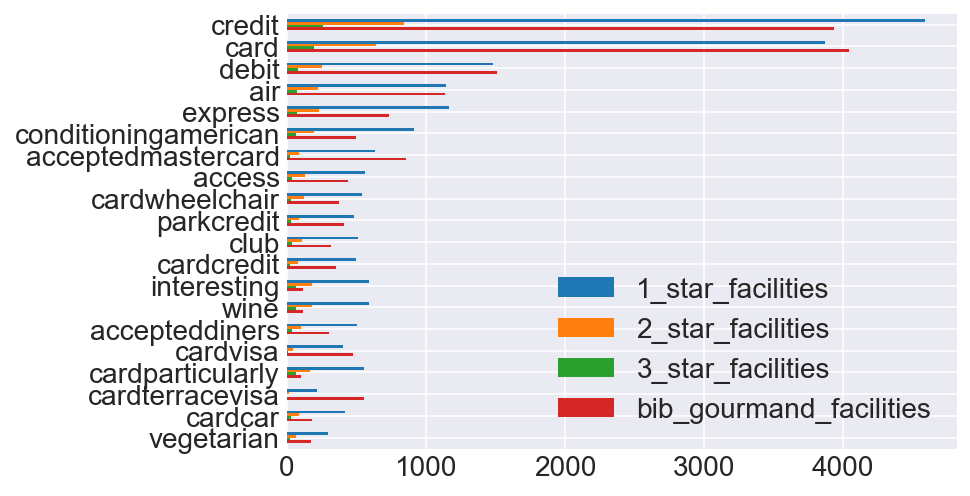

In [142]:
# Plot Top-20 Facilities Words and compare by Awards
features_list = ['1_star_facilities','2_star_facilities','3_star_facilities','bib_gourmand_facilities']

plt.rc('font', size=14)
word_counts.sort_values('all_facilities', ascending=False)[features_list].head(20).plot.barh()
plt.gca().invert_yaxis()
plt.gca().invert_yaxis()
plt.gca().invert_yaxis()
plt.show()

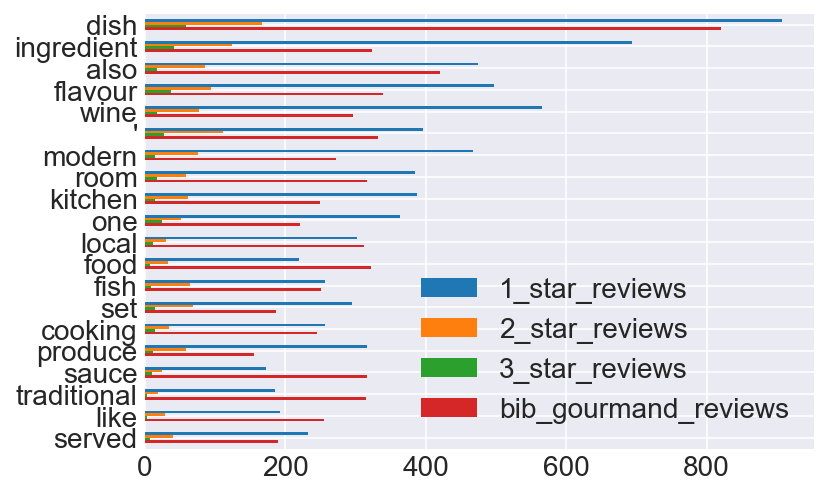

In [143]:
# Plot Top-20 Review Words and compare by Awards
features_list = ['1_star_reviews','2_star_reviews','3_star_reviews','bib_gourmand_reviews']

plt.rc('font', size=14)
word_counts.sort_values('all_reviews', ascending=False)[features_list].head(20).plot.barh()
plt.gca().invert_yaxis()
plt.show()

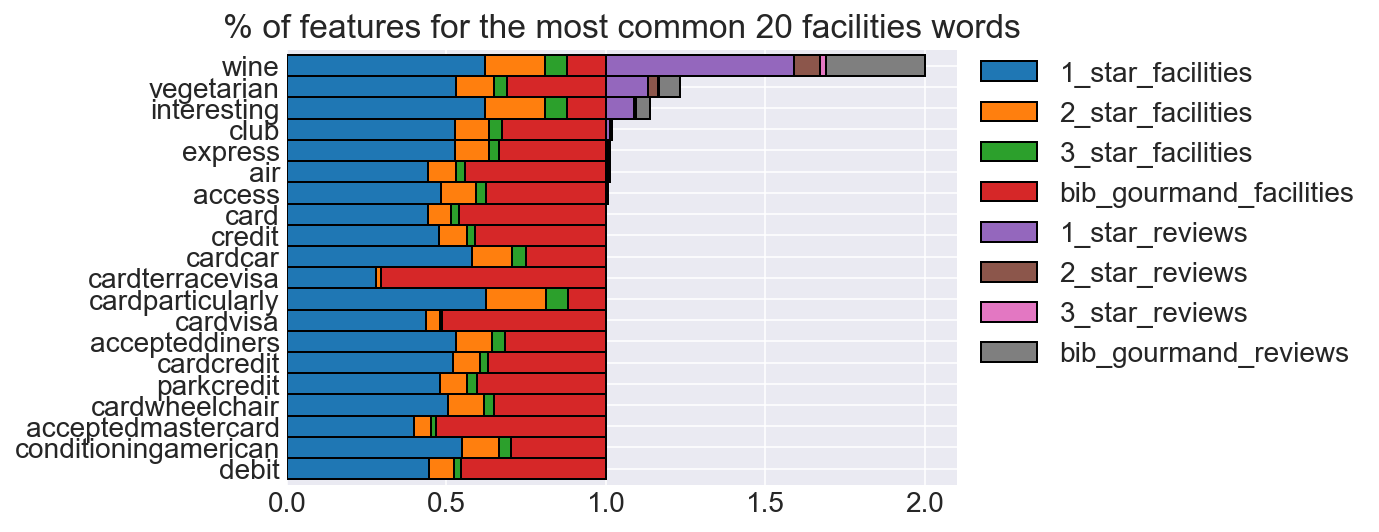

In [144]:
## visually compare features by the top 20 most frequent facility words
plt.rc('font', size=14)

(word_counts.sort_values('all_facilities', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all_facilities'], axis = 1)
 .drop(columns = ['all_facilities','all_reviews'])
 .sort_values(by = features_list)
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of features for the most common 20 facilities words')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

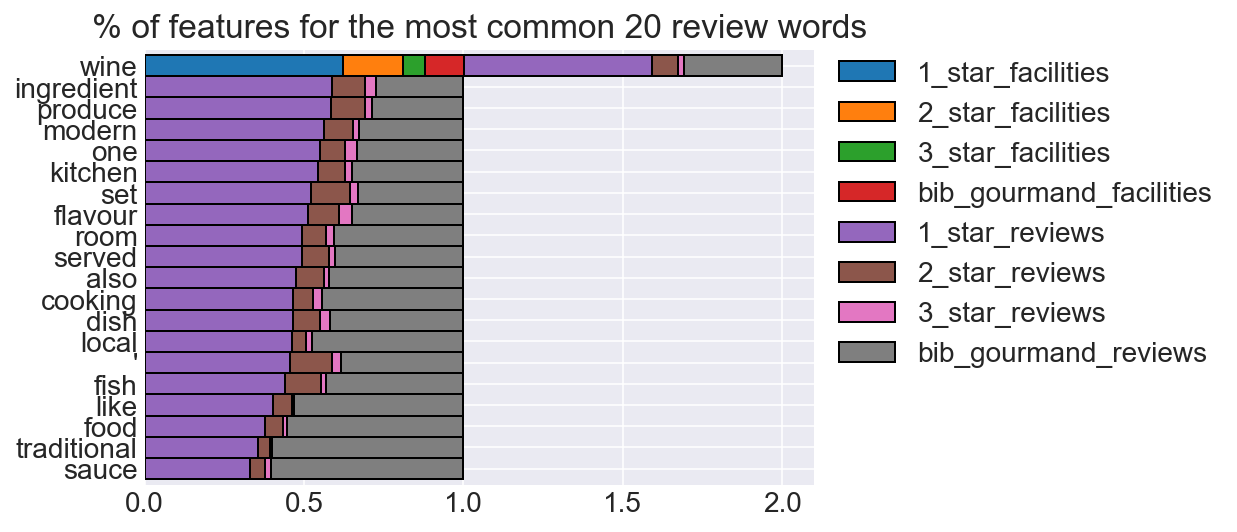

In [145]:
## visually compare features by the top 20 most frequent review words
plt.rc('font', size=14)

(word_counts.sort_values('all_reviews', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all_reviews'], axis = 1)
 .drop(columns = ['all_facilities','all_reviews'])
 .sort_values(by = features_list)
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of features for the most common 20 review words')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# N-Grams

### Bi-Grams

In [146]:
# Display Bi-Gram using ngram code
list(nltk.ngrams(all_reviews_words, 2))

[('straight', 'picture'),
 ('picture', 'book'),
 ('book', 'beautiful'),
 ('beautiful', 'inn'),
 ('inn', 'stand'),
 ('stand', 'edge'),
 ('edge', 'forest'),
 ('forest', 'diner'),
 ('diner', 'look'),
 ('look', 'forward'),
 ('forward', 'friendly'),
 ('friendly', 'family'),
 ('family', 'atmosphere'),
 ('atmosphere', 'great'),
 ('great', 'food'),
 ('food', 'also'),
 ('also', 'enjoyed'),
 ('enjoyed', 'delightful'),
 ('delightful', 'terrace'),
 ('terrace', 'dish'),
 ('dish', 'range'),
 ('range', 'regional'),
 ('regional', 'mediterranean'),
 ('mediterranean', 'whether'),
 ('whether', 'order'),
 ('order', 'steak'),
 ('steak', 'fish'),
 ('fish', 'local'),
 ('local', 'game'),
 ('game', 'something'),
 ('something', 'everyone'),
 ('everyone', 'modern'),
 ('modern', 'yet'),
 ('yet', 'cosy'),
 ('cosy', 'guestroom'),
 ('guestroom', 'overnight'),
 ('overnight', 'stay'),
 ('stay', 'steeped'),
 ('steeped', 'tradition'),
 ('tradition', 'run'),
 ('run', 'great'),
 ('great', 'commitment'),
 ('commitment', 'l

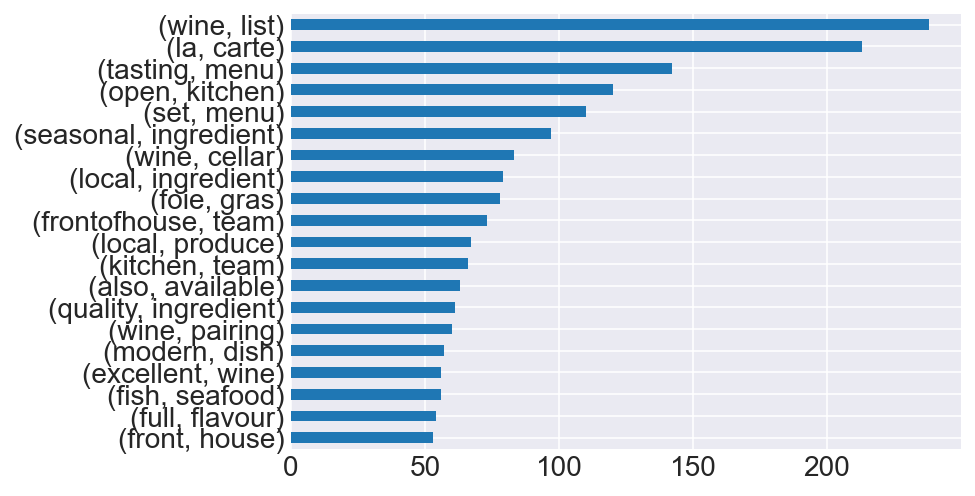

In [147]:
# Display top 10 bigram pairs for All Review words
pd.Series(nltk.bigrams(all_reviews_words)
         ).value_counts().head(20).plot.barh()
plt.gca().invert_yaxis()

In [148]:
two_star_facilities_words

['air',
 'conditioningamerican',
 'express',
 'credit',
 'cardcredit',
 'card',
 'debit',
 'card',
 'acceptedmastercard',
 'credit',
 'cardnotable',
 'sake',
 'listrestaurant',
 'offering',
 'vegetarian',
 'menusvalet',
 'parkingvisa',
 'credit',
 'cardwheelchair',
 'access',
 'air',
 'conditioningcar',
 'parkcredit',
 'card',
 'debit',
 'card',
 'acceptedmastercard',
 'credit',
 'cardterracevisa',
 'credit',
 'cardwheelchair',
 'access',
 'air',
 'conditioningamerican',
 'express',
 'credit',
 'cardcredit',
 'card',
 'debit',
 'card',
 'acceptedmastercard',
 'credit',
 'cardparticularly',
 'interesting',
 'wine',
 'listrestaurant',
 'offering',
 'vegetarian',
 'menusvalet',
 'parkingvisa',
 'credit',
 'card',
 'air',
 'conditioningamerican',
 'express',
 'credit',
 'cardcounter',
 'diningcredit',
 'card',
 'debit',
 'card',
 'acceptedmastercard',
 'credit',
 'cardnotable',
 'sake',
 'listparticularly',
 'interesting',
 'wine',
 'listvalet',
 'parkingvisa',
 'credit',
 'card',
 'air',


In [149]:
# Create Bi-Gram Variables
all_reviews_2_gram = list(nltk.ngrams(all_reviews_words, 2))
one_star_reviews_2_gram = list(nltk.ngrams(one_star_reviews_words, 2))
two_star_reviews_2_gram = list(nltk.ngrams(two_star_reviews_words, 2))
three_star_reviews_2_gram = list(nltk.ngrams(three_star_reviews_words, 2))
bib_gourmand_reviews_2_gram = list(nltk.ngrams(bib_gourmand_reviews_words, 2))

# Create Bi-Gram Variables
all_facilities_2_gram = list(nltk.ngrams(all_facilities_words, 2))
one_star_facilities_2_gram = list(nltk.ngrams(one_star_facilities_words, 2))
two_star_facilities_2_gram = list(nltk.ngrams(two_star_facilities_words, 2))
three_star_facilities_2_gram = list(nltk.ngrams(three_star_facilities_words, 2))
bib_gourmand_facilities_2_gram = list(nltk.ngrams(bib_gourmand_facilities_words, 2))

<function matplotlib.pyplot.show(close=None, block=None)>

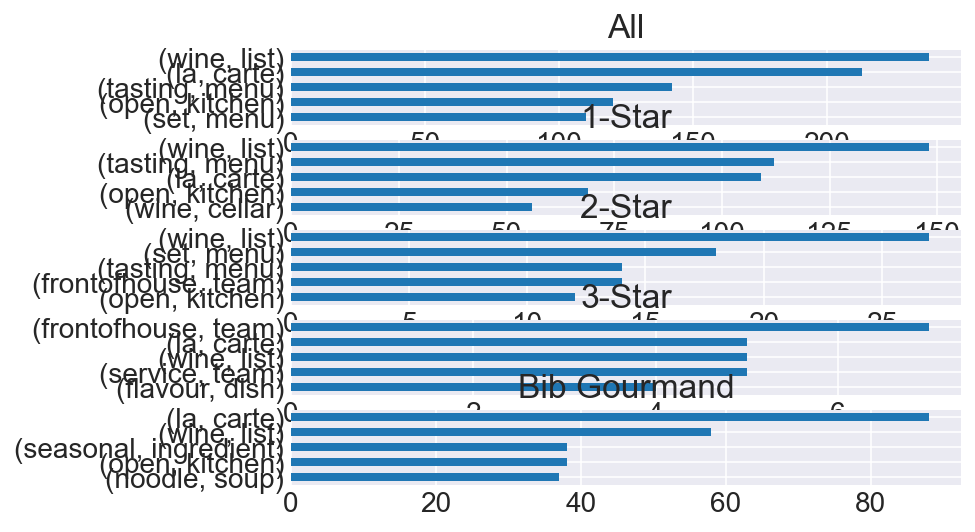

In [150]:
# Display top 5 Review bigram pairs for awards

plt.subplot(5,1,1)
pd.Series(all_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All')

plt.subplot(5,1,2)
pd.Series(one_star_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star')

plt.subplot(5,1,3)
pd.Series(two_star_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star')

plt.subplot(5,1,4)
pd.Series(three_star_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star')

plt.subplot(5,1,5)
pd.Series(bib_gourmand_reviews_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand')

plt.show

In [151]:
two_star_facilities_2_gram

[('air', 'conditioningamerican'),
 ('conditioningamerican', 'express'),
 ('express', 'credit'),
 ('credit', 'cardcredit'),
 ('cardcredit', 'card'),
 ('card', 'debit'),
 ('debit', 'card'),
 ('card', 'acceptedmastercard'),
 ('acceptedmastercard', 'credit'),
 ('credit', 'cardnotable'),
 ('cardnotable', 'sake'),
 ('sake', 'listrestaurant'),
 ('listrestaurant', 'offering'),
 ('offering', 'vegetarian'),
 ('vegetarian', 'menusvalet'),
 ('menusvalet', 'parkingvisa'),
 ('parkingvisa', 'credit'),
 ('credit', 'cardwheelchair'),
 ('cardwheelchair', 'access'),
 ('access', 'air'),
 ('air', 'conditioningcar'),
 ('conditioningcar', 'parkcredit'),
 ('parkcredit', 'card'),
 ('card', 'debit'),
 ('debit', 'card'),
 ('card', 'acceptedmastercard'),
 ('acceptedmastercard', 'credit'),
 ('credit', 'cardterracevisa'),
 ('cardterracevisa', 'credit'),
 ('credit', 'cardwheelchair'),
 ('cardwheelchair', 'access'),
 ('access', 'air'),
 ('air', 'conditioningamerican'),
 ('conditioningamerican', 'express'),
 ('express

<function matplotlib.pyplot.show(close=None, block=None)>

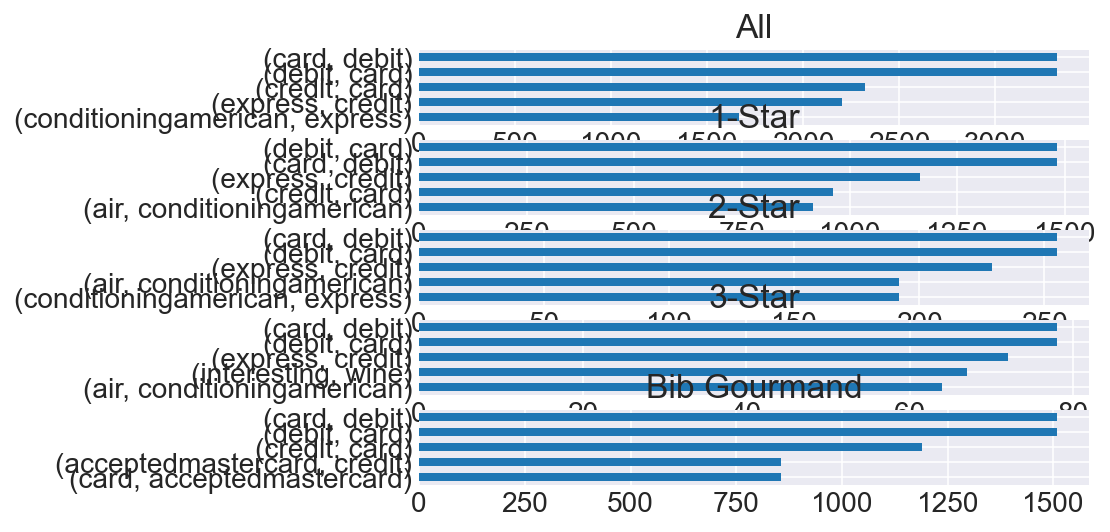

In [152]:
# Display top 5 Facilities bigram pairs for awards

plt.subplot(5,1,1)
pd.Series(all_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All')

plt.subplot(5,1,2)
pd.Series(one_star_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star')

plt.subplot(5,1,3)
pd.Series(two_star_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star')

plt.subplot(5,1,4)
pd.Series(three_star_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star')

plt.subplot(5,1,5)
pd.Series(bib_gourmand_facilities_2_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand')

plt.show

### Tri-Grams

In [153]:
# Display Tri-Gram using ngram code
list(nltk.ngrams(all_reviews_words, 3))

[('straight', 'picture', 'book'),
 ('picture', 'book', 'beautiful'),
 ('book', 'beautiful', 'inn'),
 ('beautiful', 'inn', 'stand'),
 ('inn', 'stand', 'edge'),
 ('stand', 'edge', 'forest'),
 ('edge', 'forest', 'diner'),
 ('forest', 'diner', 'look'),
 ('diner', 'look', 'forward'),
 ('look', 'forward', 'friendly'),
 ('forward', 'friendly', 'family'),
 ('friendly', 'family', 'atmosphere'),
 ('family', 'atmosphere', 'great'),
 ('atmosphere', 'great', 'food'),
 ('great', 'food', 'also'),
 ('food', 'also', 'enjoyed'),
 ('also', 'enjoyed', 'delightful'),
 ('enjoyed', 'delightful', 'terrace'),
 ('delightful', 'terrace', 'dish'),
 ('terrace', 'dish', 'range'),
 ('dish', 'range', 'regional'),
 ('range', 'regional', 'mediterranean'),
 ('regional', 'mediterranean', 'whether'),
 ('mediterranean', 'whether', 'order'),
 ('whether', 'order', 'steak'),
 ('order', 'steak', 'fish'),
 ('steak', 'fish', 'local'),
 ('fish', 'local', 'game'),
 ('local', 'game', 'something'),
 ('game', 'something', 'everyone')

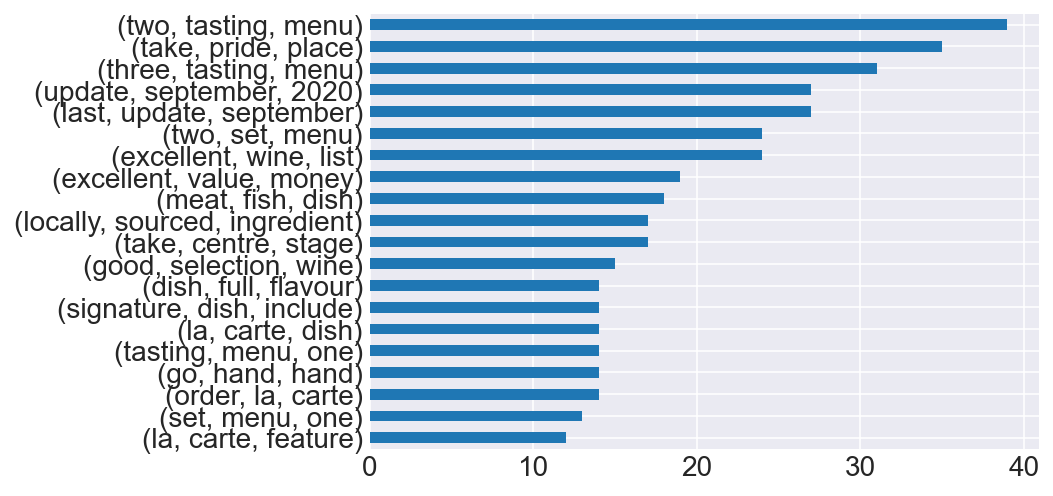

In [154]:
# Display top 10 Trigram groups for All Review words
pd.Series(nltk.ngrams(all_reviews_words, 3)
         ).value_counts().head(20).plot.barh()
plt.gca().invert_yaxis()

In [155]:
# Create Tri-Gram Variables
all_reviews_3_gram = list(nltk.ngrams(all_reviews_words, 3))
one_star_reviews_3_gram = list(nltk.ngrams(one_star_reviews_words, 3))
two_star_reviews_3_gram = list(nltk.ngrams(two_star_reviews_words, 3))
three_star_reviews_3_gram = list(nltk.ngrams(three_star_reviews_words, 3))
bib_gourmand_reviews_3_gram = list(nltk.ngrams(bib_gourmand_reviews_words, 3))

# Create Tri-Gram Variables
all_facilities_3_gram = list(nltk.ngrams(all_facilities_words, 3))
one_star_facilities_3_gram = list(nltk.ngrams(one_star_facilities_words, 3))
two_star_facilities_3_gram = list(nltk.ngrams(two_star_facilities_words, 3))
three_star_facilities_3_gram = list(nltk.ngrams(three_star_facilities_words, 3))
bib_gourmand_facilities_3_gram = list(nltk.ngrams(bib_gourmand_facilities_words, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

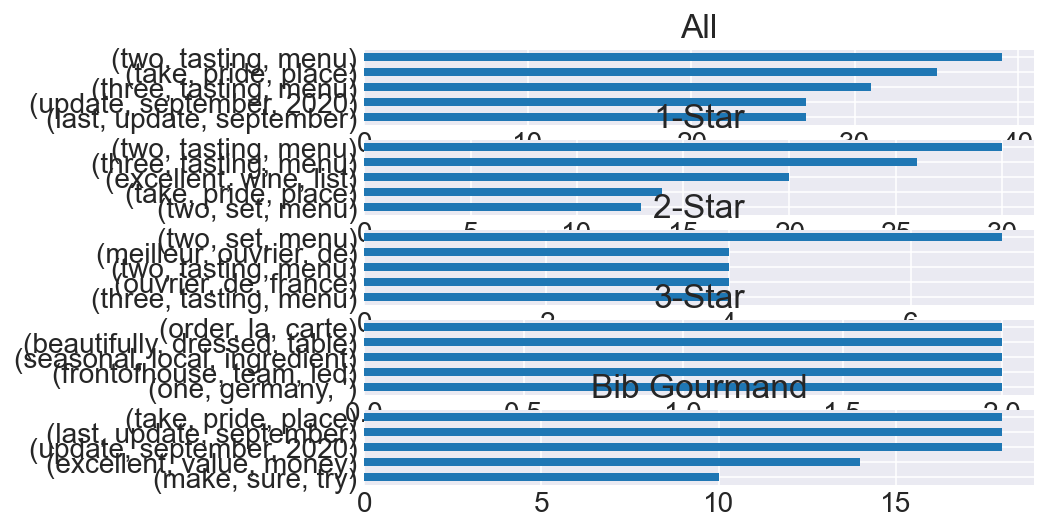

In [156]:
# Display top 5 Review Trigram groups for awards

plt.subplot(5,1,1)
pd.Series(all_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All')

plt.subplot(5,1,2)
pd.Series(one_star_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star')

plt.subplot(5,1,3)
pd.Series(two_star_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star')

plt.subplot(5,1,4)
pd.Series(three_star_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star')

plt.subplot(5,1,5)
pd.Series(bib_gourmand_reviews_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand')

plt.show

In [157]:
two_star_facilities_3_gram

[('air', 'conditioningamerican', 'express'),
 ('conditioningamerican', 'express', 'credit'),
 ('express', 'credit', 'cardcredit'),
 ('credit', 'cardcredit', 'card'),
 ('cardcredit', 'card', 'debit'),
 ('card', 'debit', 'card'),
 ('debit', 'card', 'acceptedmastercard'),
 ('card', 'acceptedmastercard', 'credit'),
 ('acceptedmastercard', 'credit', 'cardnotable'),
 ('credit', 'cardnotable', 'sake'),
 ('cardnotable', 'sake', 'listrestaurant'),
 ('sake', 'listrestaurant', 'offering'),
 ('listrestaurant', 'offering', 'vegetarian'),
 ('offering', 'vegetarian', 'menusvalet'),
 ('vegetarian', 'menusvalet', 'parkingvisa'),
 ('menusvalet', 'parkingvisa', 'credit'),
 ('parkingvisa', 'credit', 'cardwheelchair'),
 ('credit', 'cardwheelchair', 'access'),
 ('cardwheelchair', 'access', 'air'),
 ('access', 'air', 'conditioningcar'),
 ('air', 'conditioningcar', 'parkcredit'),
 ('conditioningcar', 'parkcredit', 'card'),
 ('parkcredit', 'card', 'debit'),
 ('card', 'debit', 'card'),
 ('debit', 'card', 'accep

<function matplotlib.pyplot.show(close=None, block=None)>

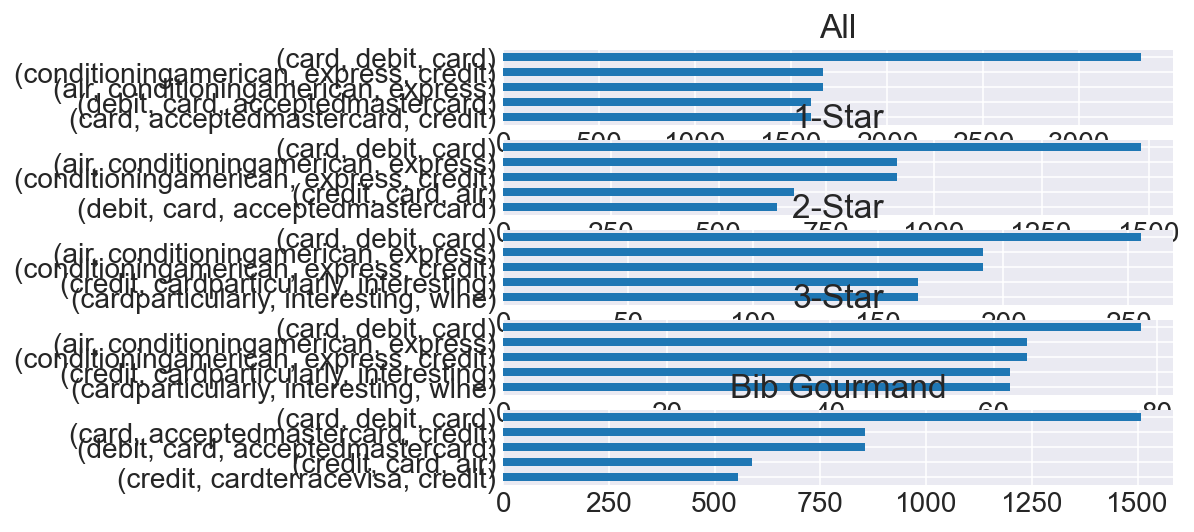

In [158]:
# Display top 5 Facilities Trigram groups for awards

plt.subplot(5,1,1)
pd.Series(all_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('All')

plt.subplot(5,1,2)
pd.Series(one_star_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('1-Star')

plt.subplot(5,1,3)
pd.Series(two_star_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('2-Star')

plt.subplot(5,1,4)
pd.Series(three_star_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('3-Star')

plt.subplot(5,1,5)
pd.Series(bib_gourmand_facilities_3_gram).value_counts().head(5).plot.barh()
plt.gca().invert_yaxis()
plt.title('Bib Gourmand')

plt.show

# WordClouds

In [159]:
from wordcloud import WordCloud

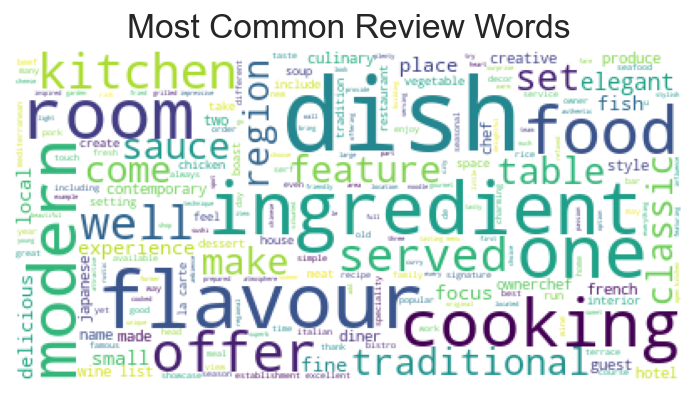

In [160]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(all_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Review Words')
plt.show()

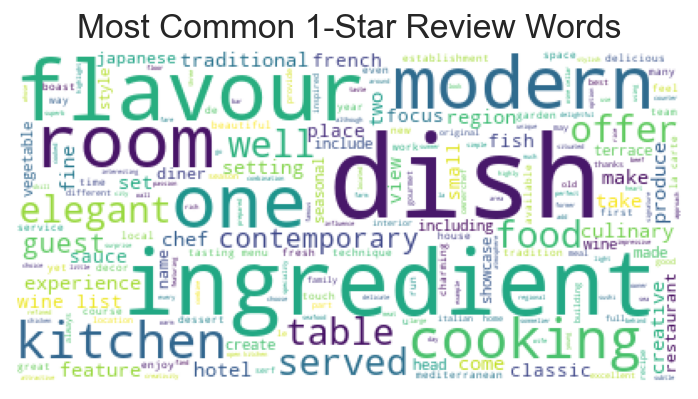

In [161]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Review Words')
plt.show()

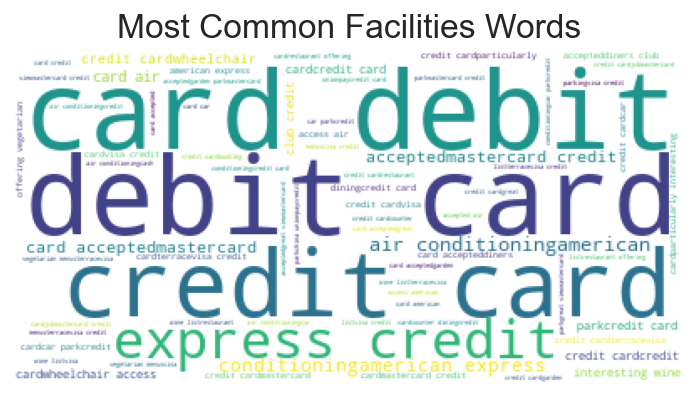

In [162]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(all_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Facilities Words')
plt.show()

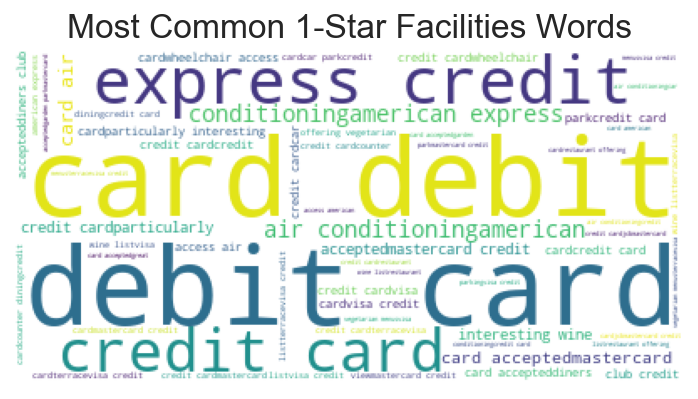

In [163]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Facilities Words')
plt.show()

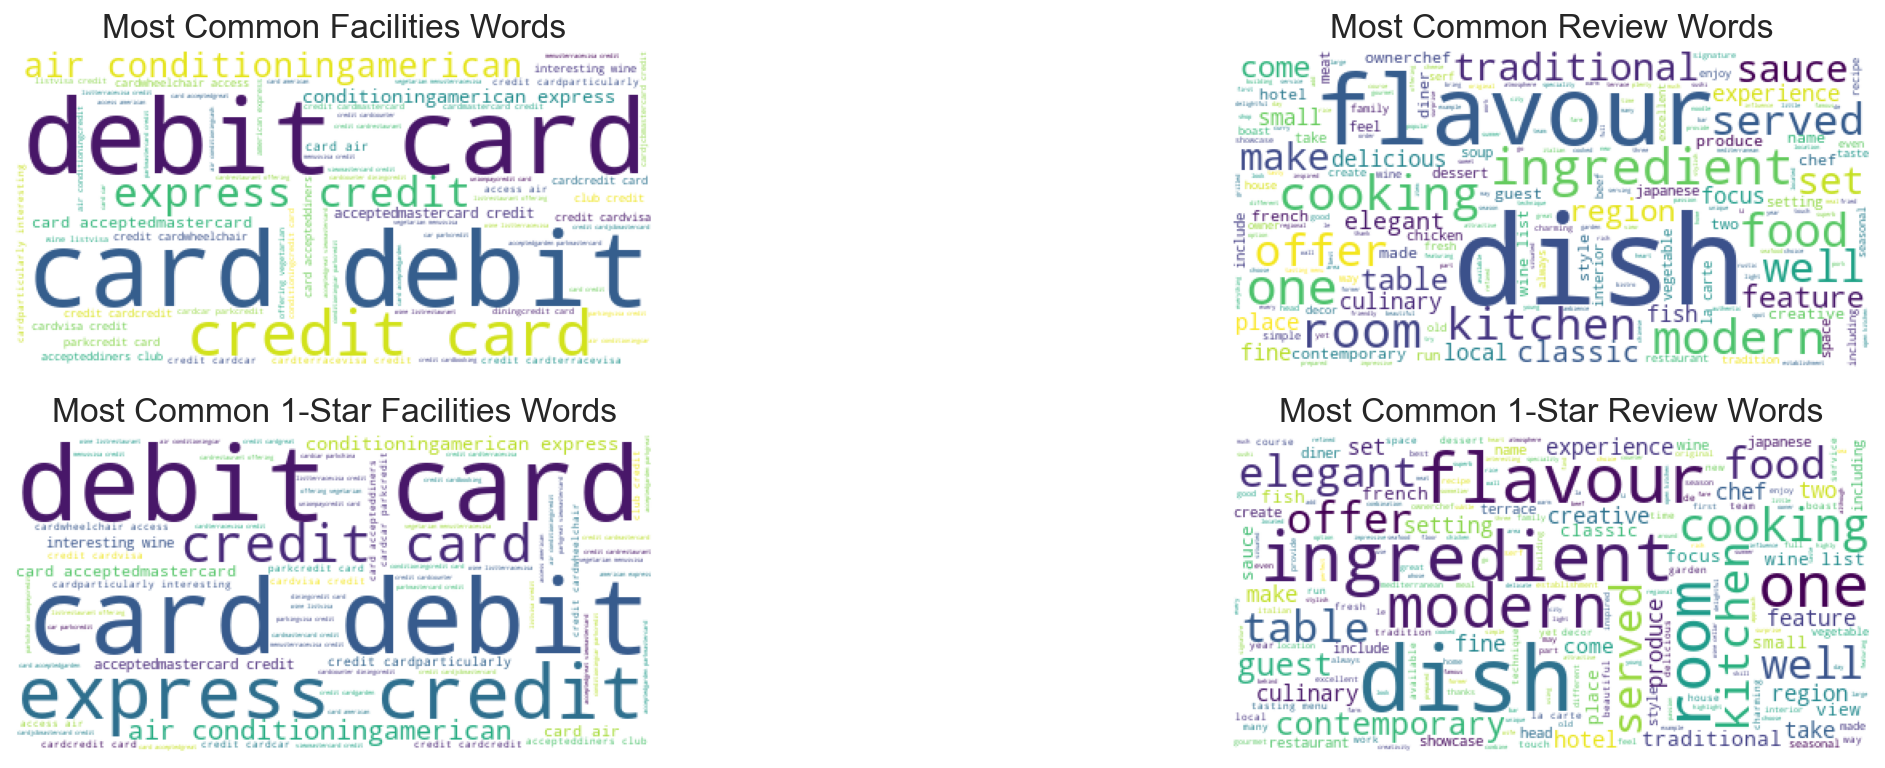

In [164]:
# making multiple word clouds:

plt.rc('figure', figsize=(20, 10))

plt.subplot(3,2,1)
img = WordCloud(background_color='white'
               ).generate(' '.join(all_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Facilities Words')

plt.subplot(3,2,2)
img = WordCloud(background_color='white'
               ).generate(' '.join(all_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Review Words')

plt.subplot(3,2,3)
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_facilities_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Facilities Words')

plt.subplot(3,2,4)
img = WordCloud(background_color='white'
               ).generate(' '.join(one_star_reviews_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common 1-Star Review Words')

plt.show()